<a href="https://colab.research.google.com/github/abhishek0478/ML-project---Regression/blob/main/Bike_sharing_demand_analysis1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
from os import pathconf_names
path = '/content/drive/MyDrive/SeoulBikeData.csv'

In [201]:
df = pd.read_csv(path,encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [202]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings ('ignore')

In [203]:
df.shape

(8760, 14)

In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [205]:
df.isna().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [206]:
df.duplicated().sum()


0

In [207]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

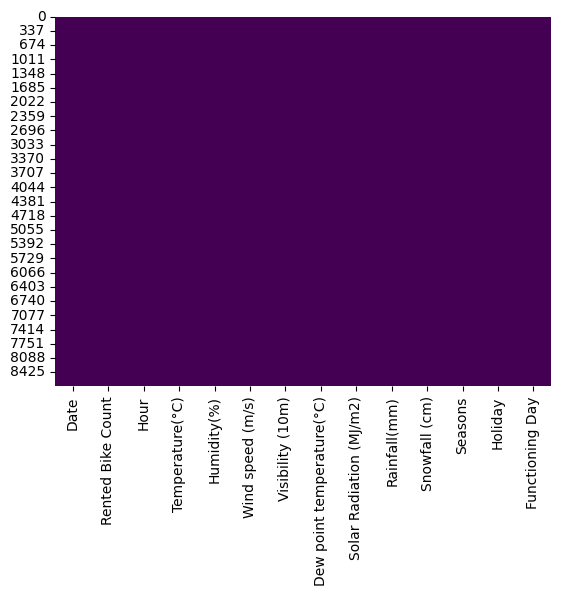

In [208]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [209]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [210]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [211]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [212]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [213]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [214]:
df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

##Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*









##**Data Wrangling**

In [216]:
#Changign the date column into three day, month , year.
df[['day', 'month', 'year']] = df['Date'].str.split('/', expand=True)


In [217]:
df['Date'] = pd.to_datetime(df['Date'])


In [218]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [219]:
df['weekdays_weekend'] = df['day'].apply(lambda x: 1 if x =='Saturday' or x =='Sunday' else 0 )

In [220]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [221]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [222]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

One hot encoding for seasons column

In [223]:
df = df.drop(columns = ['Date','year','day'],axis = 1)

In [224]:
# change uint64 column into category column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] = df[col].astype('category')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

##**EDA**

## **Univariate Analysis**

* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

## **Analysis of Dependent Variable:**

* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

##**Analysation of categorical variables**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type***

<Axes: xlabel='month', ylabel='Rented_Bike_Count'>

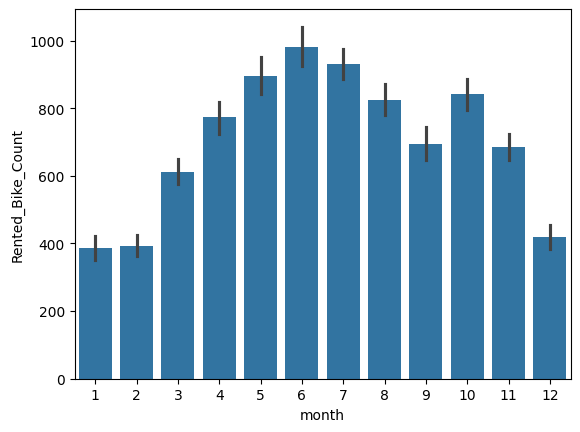

In [226]:
sns.barplot(x='month',y='Rented_Bike_Count',data = df)

* ***From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.***

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

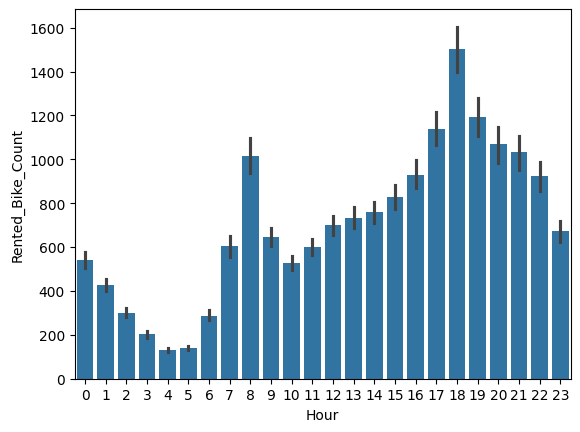

In [227]:
sns.barplot(x='Hour',y='Rented_Bike_Count',data = df)

* ***In the above plot which shows the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

Text(0.5, 1.0, 'Relationship between Rented_Bike_Count and Season')

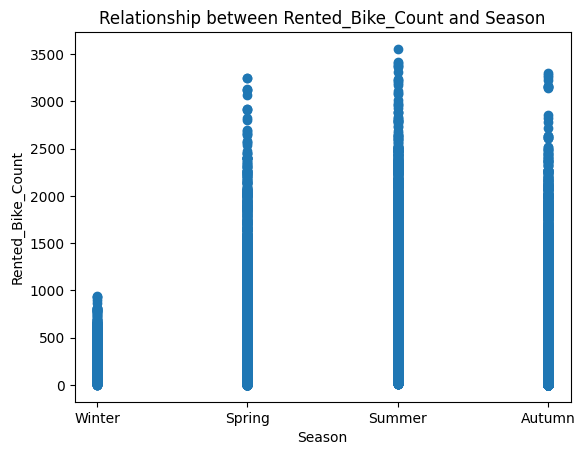

In [228]:
plt.scatter(df['Seasons'], df['Rented_Bike_Count'])
plt.xlabel('Season')
plt.ylabel('Rented_Bike_Count')
plt.title('Relationship between Rented_Bike_Count and Season')


* ***From the above scatter plot we can see that in winter season demand for rented bikes are very less.***

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

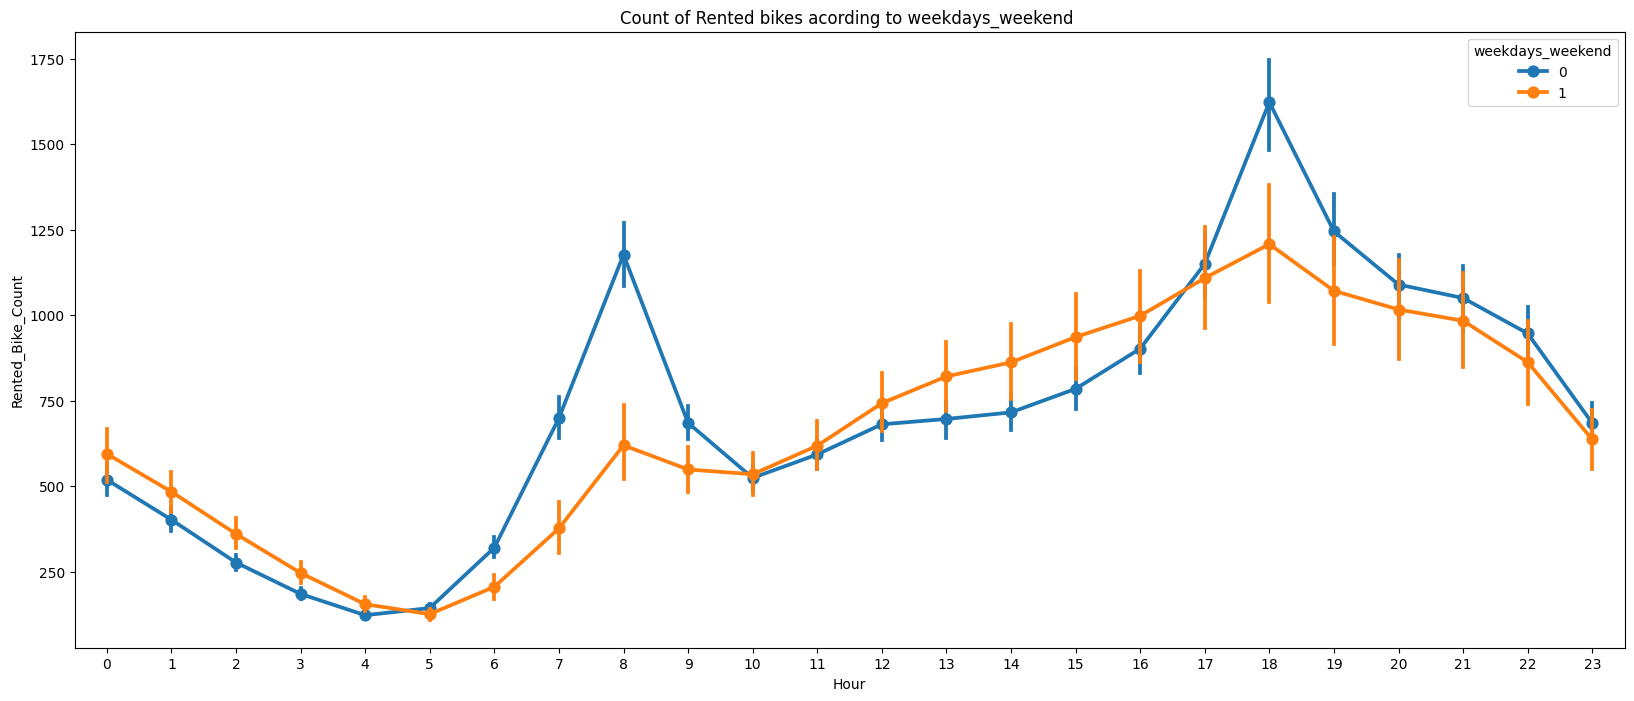

In [229]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

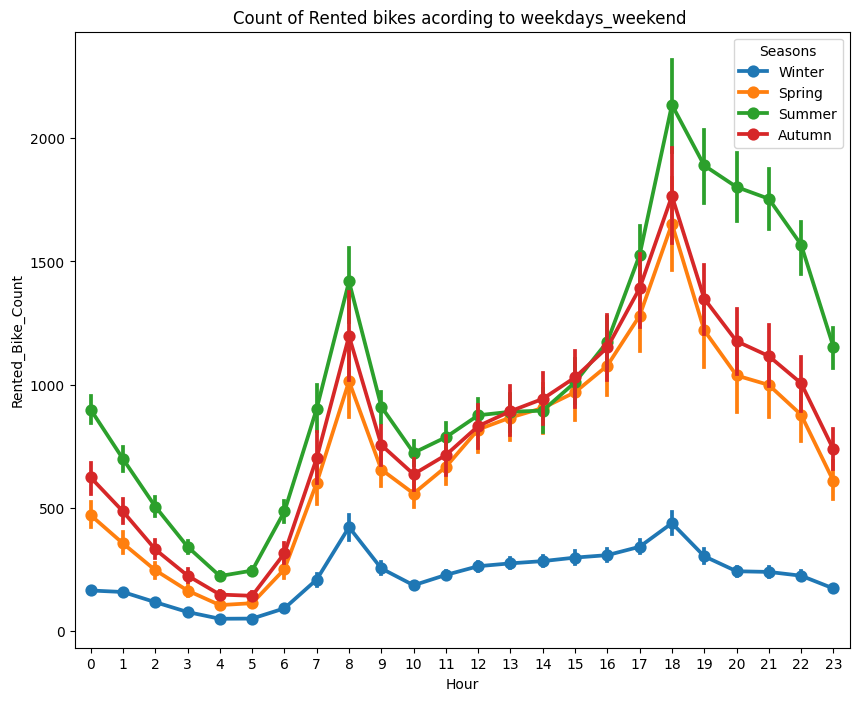

In [230]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

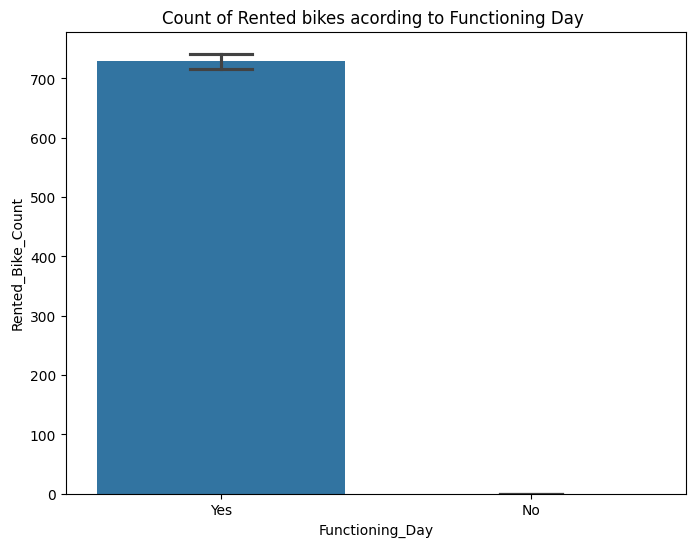

In [231]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

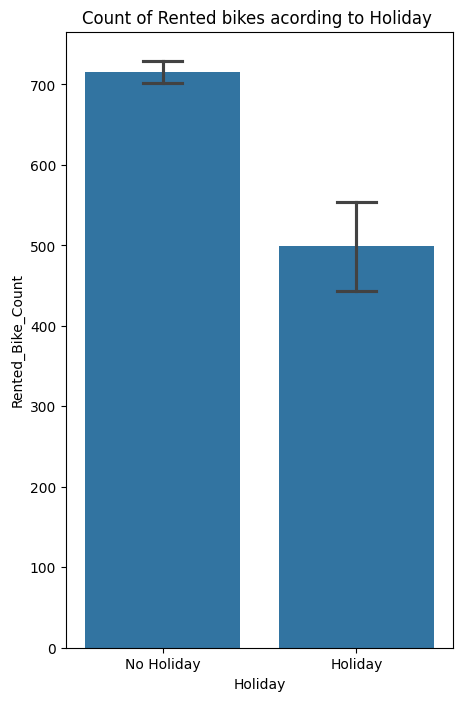

In [232]:
fig,ax=plt.subplots(figsize=(5,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***From the above barplot demand is less on the days of holiday.***


<Axes: xlabel='Temperature'>

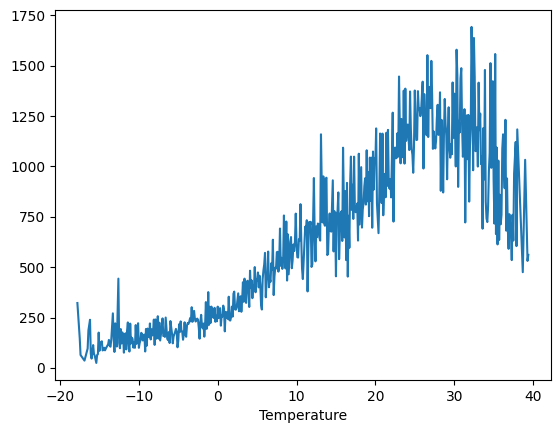

In [233]:
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

* ***From the above plot demand for bike is high when the teperature ranges between 25 degree to 35 degree and there is a positive correlation between temperature and bike demand.***


In [234]:
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [235]:
# missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
# plt.figure(figsize=(16,5))
# ax = sns.pointplot('index',0,data= missing)
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values")
# plt.ylabel("PERCENTAGE")
# plt.show()

##Analysis of numerical data

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

In [236]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

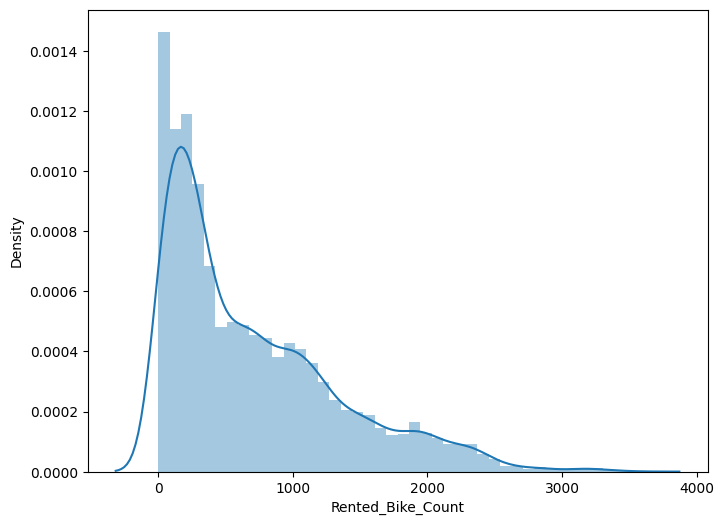

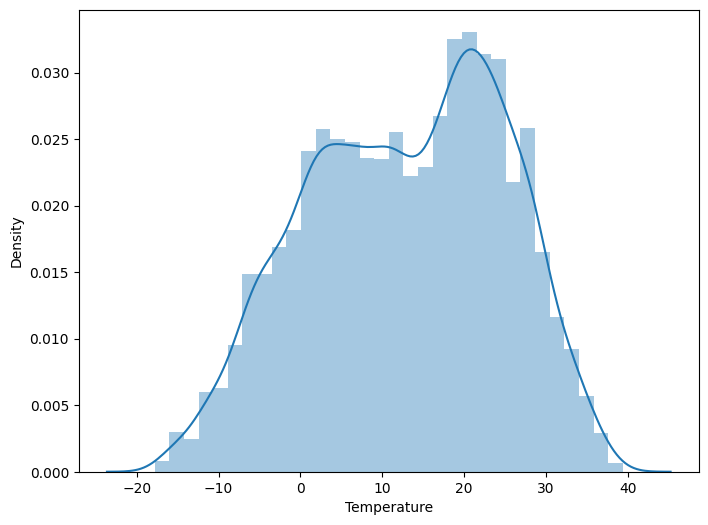

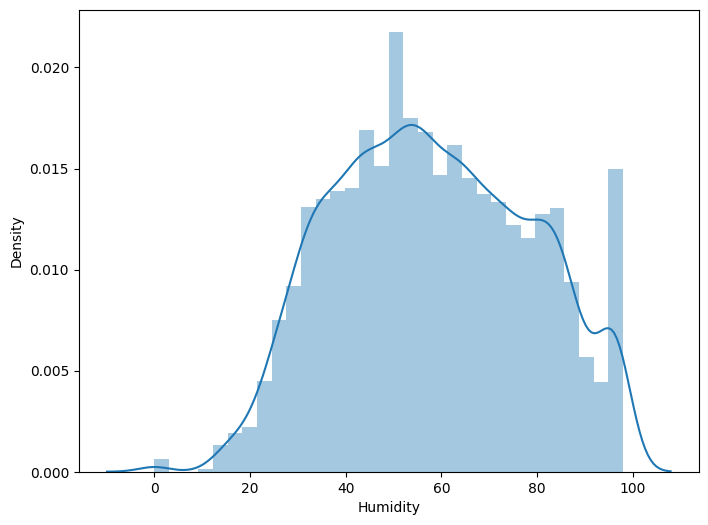

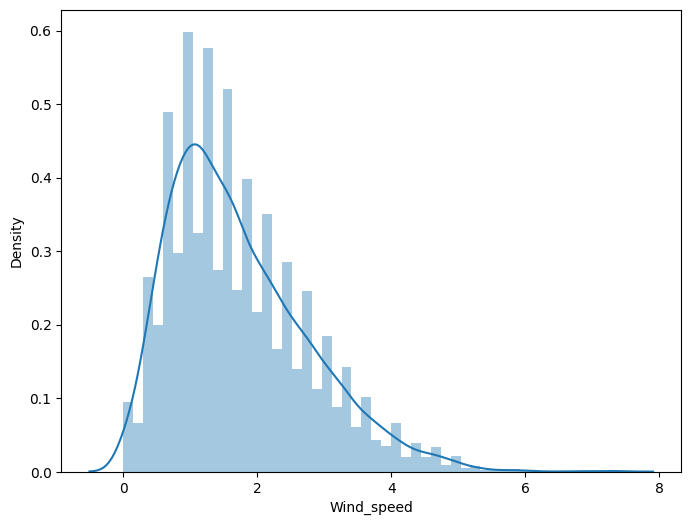

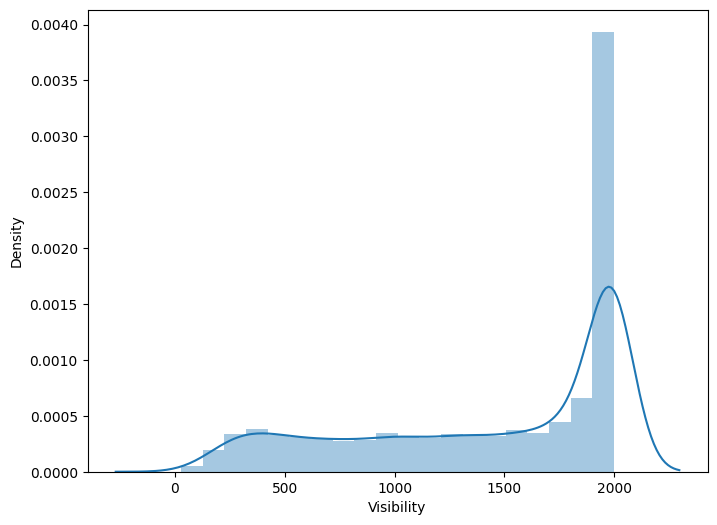

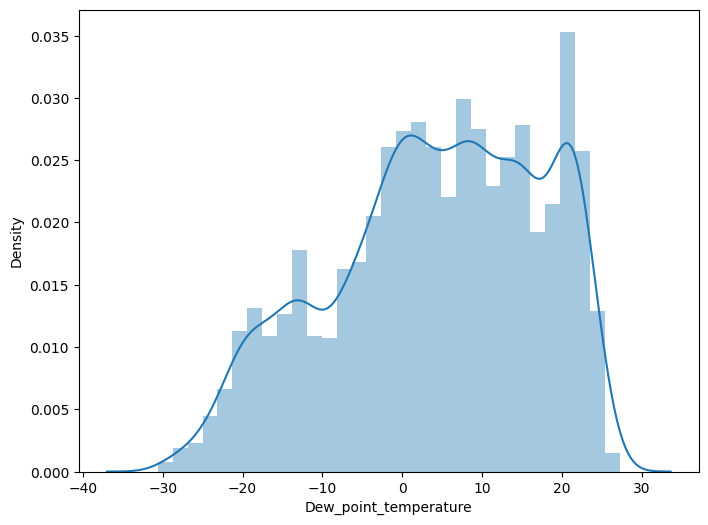

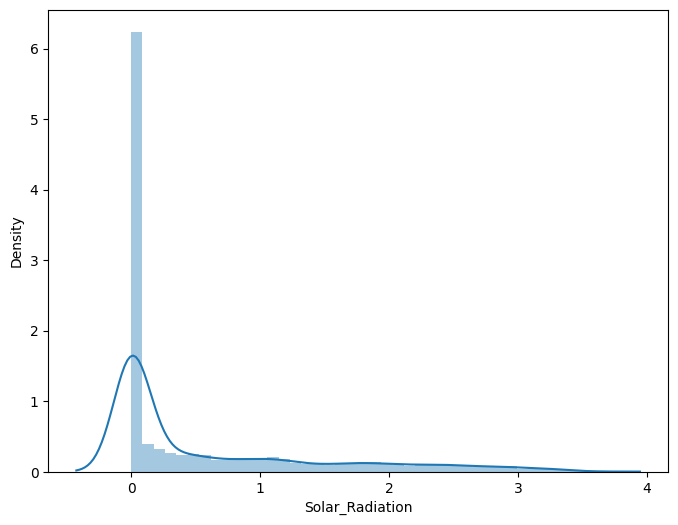

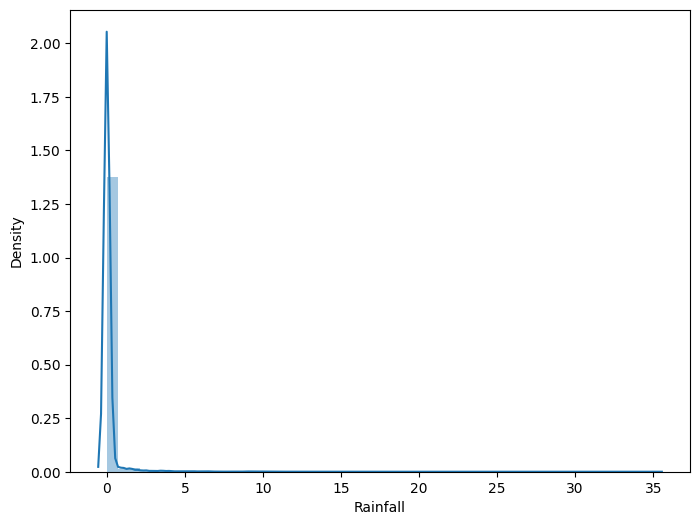

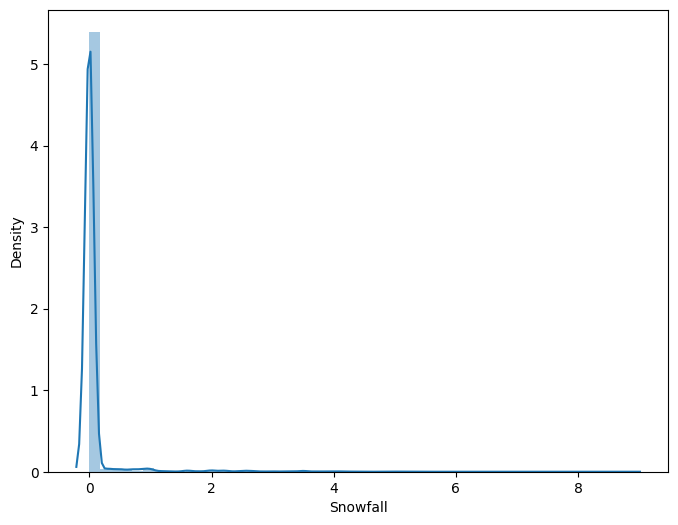

In [237]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(8,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##Regression plot

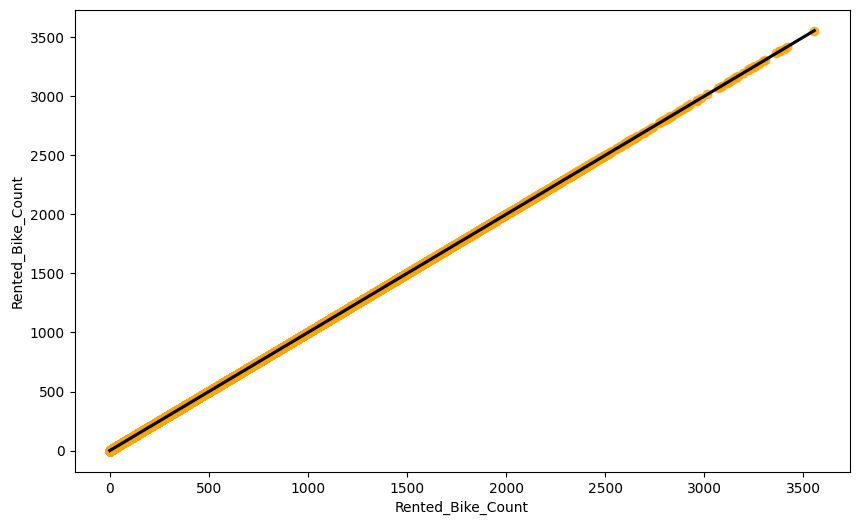

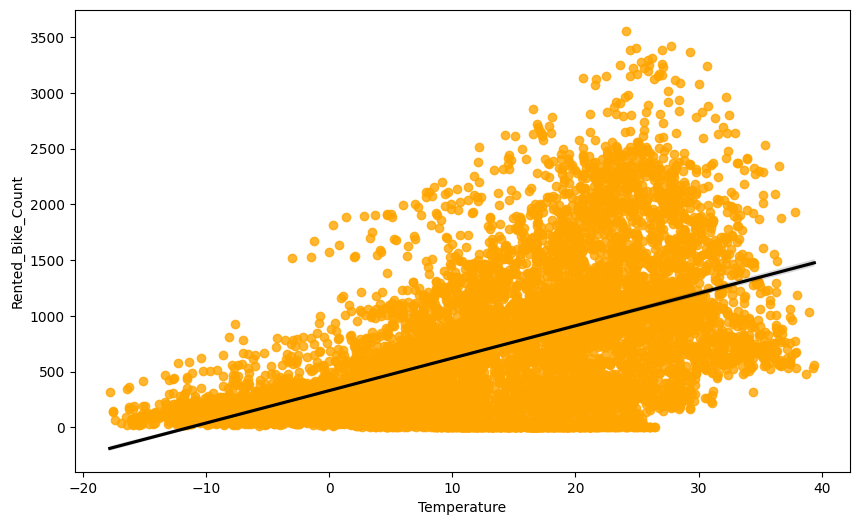

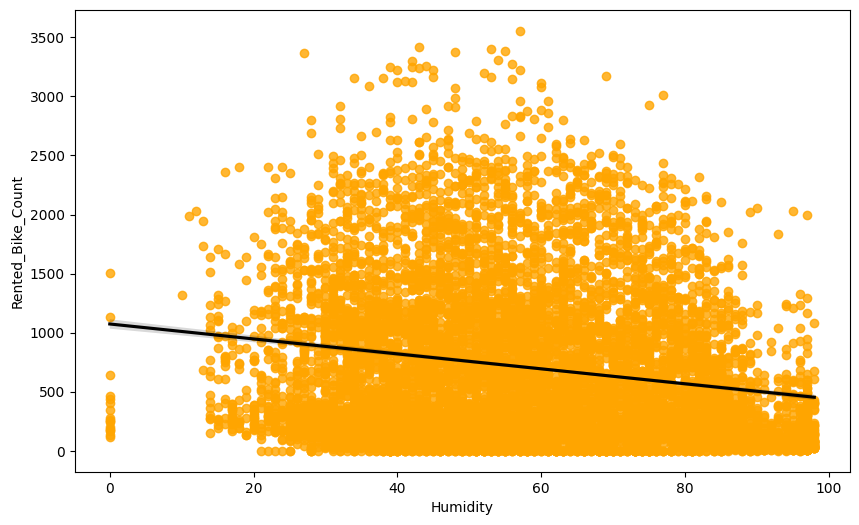

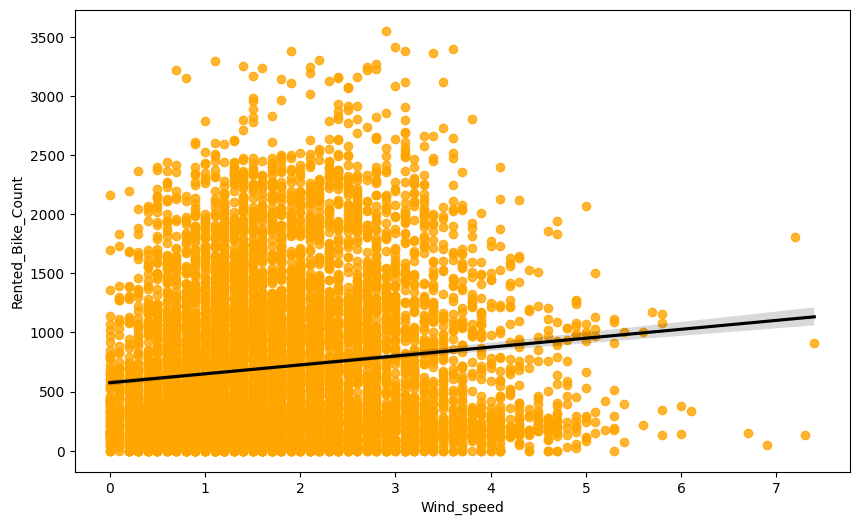

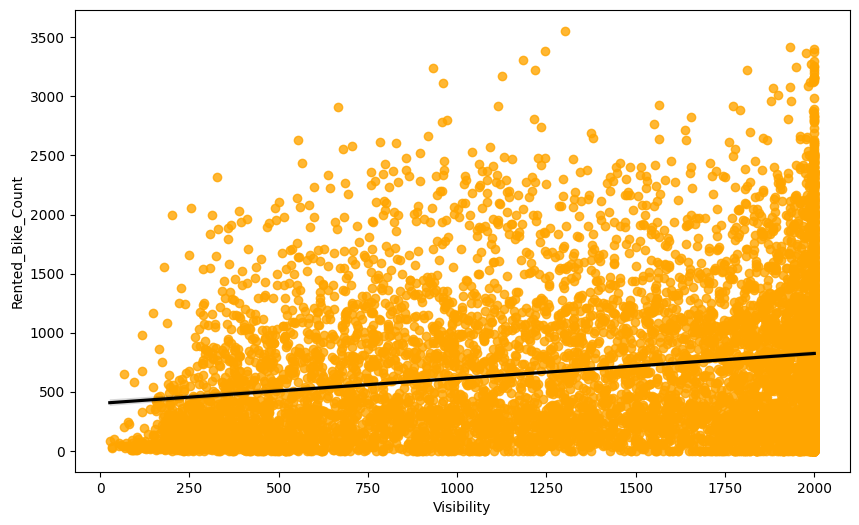

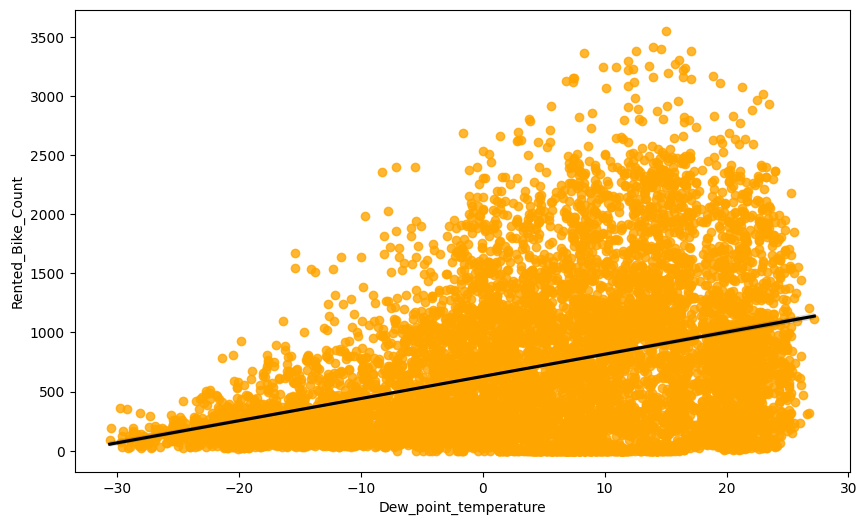

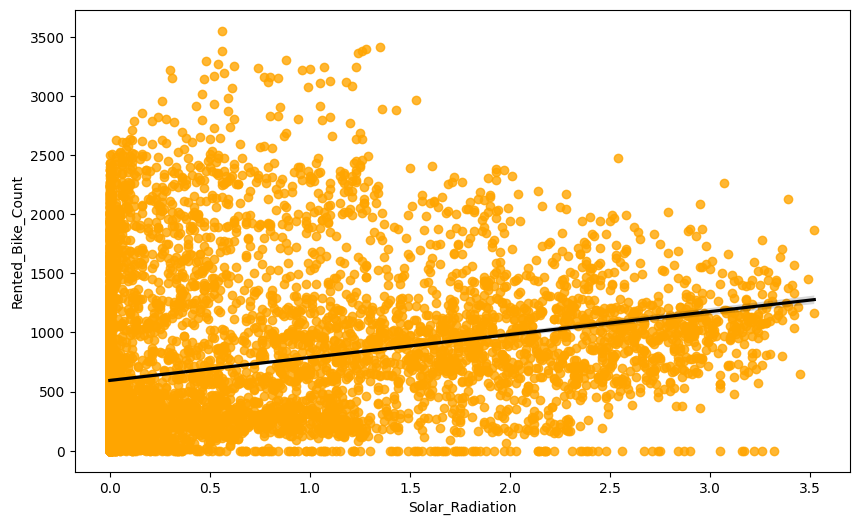

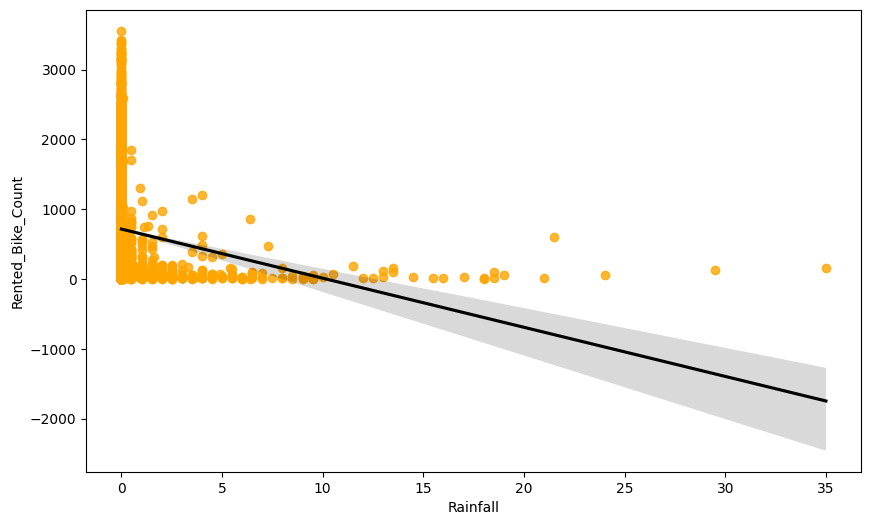

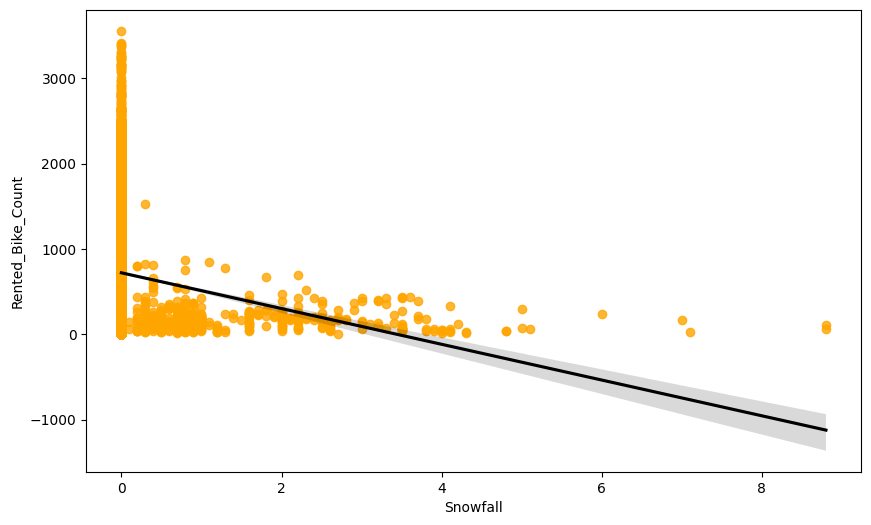

In [238]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color":"black"})

##Data Normalization

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

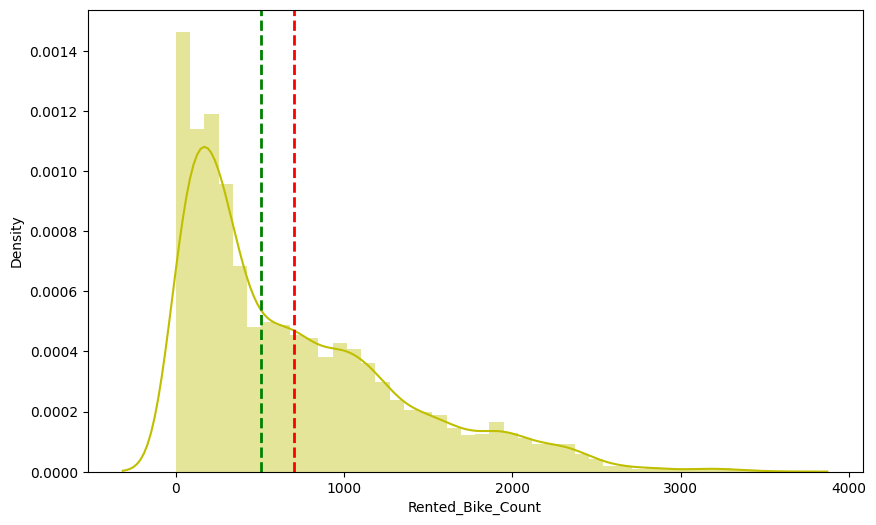

In [239]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

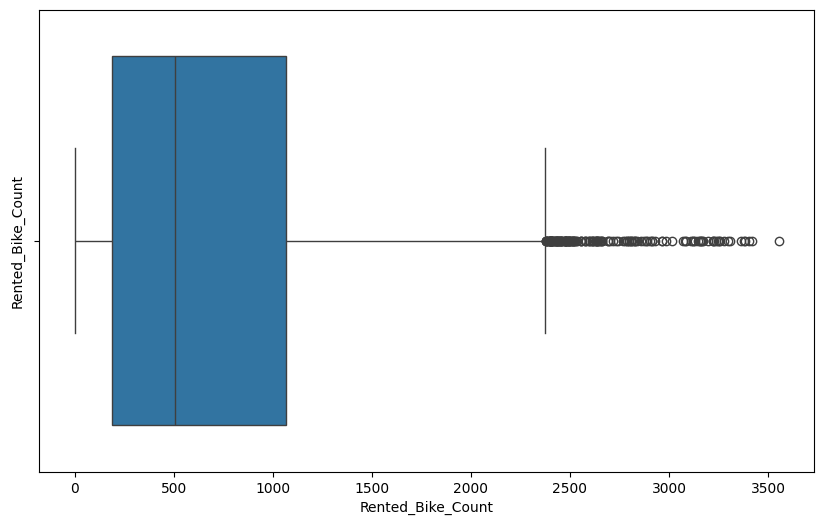

In [240]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

In [241]:
yy= np.sqrt(df['Rented_Bike_Count'])

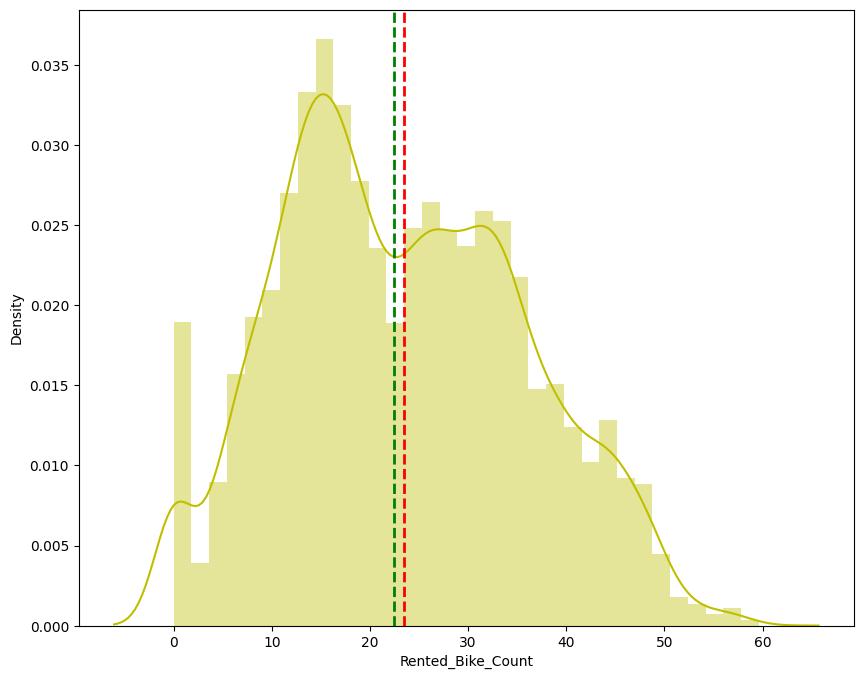

In [242]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='green', linestyle='dashed', linewidth=2)

plt.show()

In [243]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [244]:
# selected_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']
# sns.pairplot(df[selected_columns])

<Axes: >

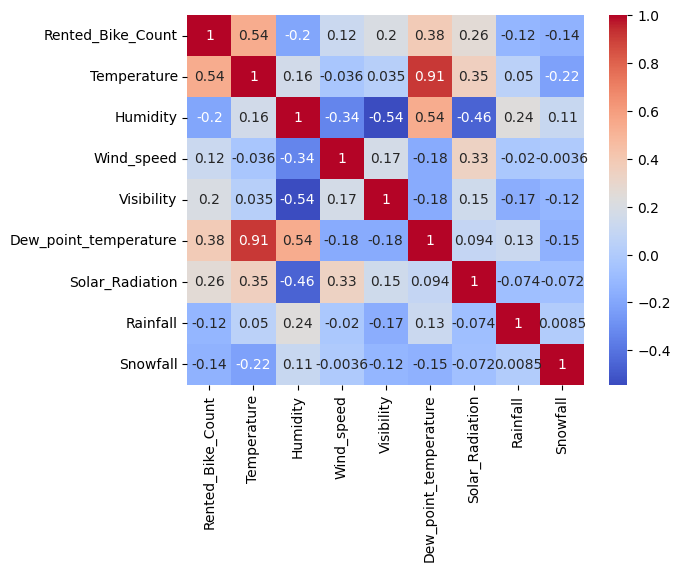

In [245]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall





* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

In [246]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)

##Hypothesis Testing

In [247]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
import pandas as pd
import scipy.stats as stats


In [248]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')

#Test 1

In [249]:
rented_bike_count_holiday = df[df['Holiday'] == 1]['Rented_Bike_Count']
rented_bike_count_non_holiday = df[df['Holiday'] == 0]['Rented_Bike_Count']


In [250]:
# Null hypothesis: There is no significant difference in the average rented bike counts between holidays and non-holidays.
# Alternative hypothesis: There is a significant difference in the average rented bike counts between holidays and non-holidays.


In [251]:
t_statistic, p_value = stats.ttest_ind(rented_bike_count_holiday, rented_bike_count_non_holiday)


In [252]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average rented bike counts between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between holidays and non-holidays.")


Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between holidays and non-holidays.


#Test 2

In [253]:
seasons = df['Seasons'].unique()  # Get unique season values
temperature_groups = [df[df['Seasons'] == season]['Temperature'] for season in seasons]


In [254]:
# Null hypothesis: There is no significant difference in the average temperature between the different seasons.
# Alternative hypothesis: There is a significant difference in the average temperature between the different seasons.


In [255]:
f_statistic, p_value = stats.f_oneway(*temperature_groups)


In [256]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average temperature between the different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average temperature between the different seasons.")


Reject the null hypothesis. There is a significant difference in the average temperature between the different seasons.


#Test 3

In [257]:
rented_bike_count_weekdays = df[df['weekdays_weekend'] == 'Weekday']['Rented_Bike_Count']
rented_bike_count_weekends = df[df['weekdays_weekend'] == 'Weekend']['Rented_Bike_Count']


In [258]:
# Null hypothesis: There is no significant difference in the average rented bike counts between weekdays and weekends.
# Alternative hypothesis: There is a significant difference in the average rented bike counts between weekdays and weekends.


In [259]:
t_statistic, p_value = stats.ttest_ind(rented_bike_count_weekdays, rented_bike_count_weekends)


In [260]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average rented bike counts between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between weekdays and weekends.")


Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between weekdays and weekends.


In [261]:
# df["Functioning_Day"] = df["Functioning_Day"].map({"No ":0, "Yes":1})
# df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})

# Create dummy variable

In [262]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

##One hot encoding

In [263]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [264]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [265]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [267]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [268]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

# **ML model Implementation**

#Simple linear regression model

In [269]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [270]:
#check the score
reg.score(X_train, y_train)

0.7557884266778845

In [271]:
#check the coefficeint
reg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [272]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [273]:
#defining the object
reg = LinearRegression()
reg.fit(X_train, y_train)

#training dataset score
training_score = reg.score(X_train, y_train)

#predicting the value
y_pred = reg.predict(X_test)

#calculating the training accuracy
print("Train score:" ,training_score)

#calculating the MSE
MSE  = mean_squared_error((y_test),(y_pred))
print("Test MSE :" , MSE)

#calculating the testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 :" ,r2)


Train score: 0.7557884266778845
Test MSE : 36.64474647323366
Test R2 : 0.7680218977120629


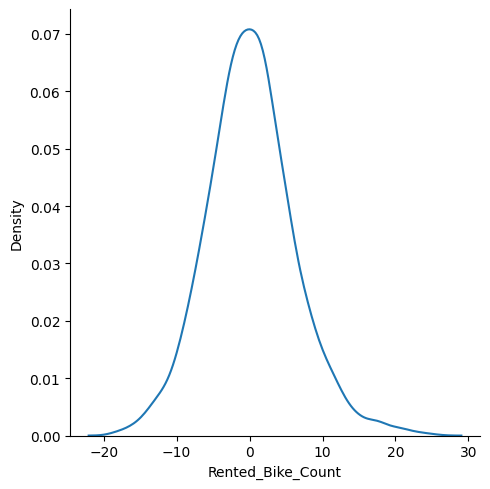

In [274]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')


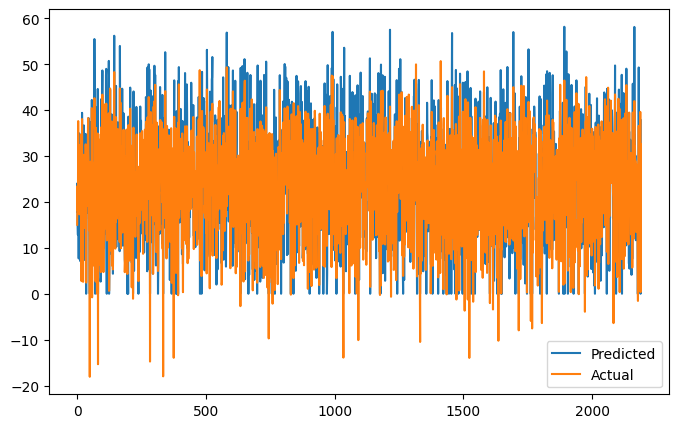

In [275]:
#plot to compare the predicted values against the actual values.
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()


#1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used is a Linear Regression model, a simple and interpretable machine learning algorithm. Linear Regression is used for predicting a continuous target variable based on one or more input features. It models the relationship between the input features and the target variable as a linear equation.

Performance Evaluation:

Train Score (R-squared): The train score of approximately 0.755 indicates that the model explains about 75.5% of the variance in the training data. A higher R-squared is generally better, and this suggests that the model captures a significant portion of the variation in the data.

Test R-squared (R2): The test R2 score of about 0.768 implies that the model accounts for roughly 76.8% of the variance in the test data. A higher R2 score indicates a better fit to the test data.


Cross validation and Hyperparameter tuning

In [276]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Create a Linear Regression model (you can replace this with any other regression model)
model = LinearRegression()

# Define hyperparameter search space (you can customize this based on your model)
param_dist = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True, False]}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model with the entire training dataset
best_model.fit(X_train, y_train)

training_score_val = best_model.score(X_train, y_train)
# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)

# Calculate evaluation metrics for the test predictions (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score((y_test),(test_predictions))


print("Best Hyperparameters:", best_params)


#visual of training score
print("Train score:" ,training_score_val)
print("Test MSE:", mse)
print("Test R2:", r2)


Best Hyperparameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}
Train score: 0.7557884266778845
Test MSE: 36.64474647323366
Test R2: 0.7680218977120629


**Which hyperparameter optimization technique have you used and why?**
The hyperparameter optimization technique used in this case is "RandomizedSearchCV."

RandomizedSearchCV is chosen for several reasons:

**Efficiency**: Compared to GridSearchCV, RandomizedSearchCV explores a random subset of hyperparameter combinations, making it more efficient when there are a large number of possible hyperparameter settings.

**Exploration**: It provides a balance between random exploration and an exhaustive search. It randomly samples hyperparameters within specified ranges, which can be beneficial in discovering hidden, effective configurations.

**Parallelization**: It allows parallel processing, using multiple CPU cores (specified by n_jobs=-1), which speeds up the search process.

**Scoring**: The choice of 'neg_mean_squared_error' as the scoring metric indicates that the search aims to minimize the mean squared error, a common metric for regression tasks.

RandomizedSearchCV efficiently explores a range of hyperparameter settings, leading to the discovery of a set of hyperparameters that perform well. In this case, it led to a model with the same training score as the initial model, indicating that the optimal hyperparameters did not significantly improve the model's performance. However, it's a valuable technique to systematically search for optimal hyperparameters and can lead to substantial performance improvements in other cases.



#Ridge regression

In [277]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter (regularization strength)

# Fit the Ridge model to the training data
ridge_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = ridge_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = ridge_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)


print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Test R-squared (R2) Score: 0.88
Training R-squared (R2) Score: 0.91
Mean Squared Error (MSE): 18.88


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Ridge Regression with polynomial features (degree=2). Here's the explanation and performance summary based on the provided evaluation metrics:

**Model Explanation:**
Ridge Regression is a linear regression technique that includes L2 regularization to prevent overfitting. It's combined with Polynomial Features, which generates new features by considering interactions between variables. The degree=2 indicates quadratic features.

**Performance Evaluation:**
1. **Test R-squared (R2) Score: 0.88**
   - The R2 score measures the proportion of variance in the target variable explained by the model.
   - A score of 0.88 indicates that approximately 88% of the variance is accounted for, suggesting the model's effectiveness in explaining test data.

2. **Training R-squared (R2) Score: 0.91**
   - Consistency between training and test R2 scores (0.91) suggests that the model generalizes well to new data and is not overfitting.


Overall, this Ridge Regression model with polynomial features (degree=2) performs well and can be valuable in applications like predictive modeling, where understanding relationships between variables is crucial for informed decision-making.

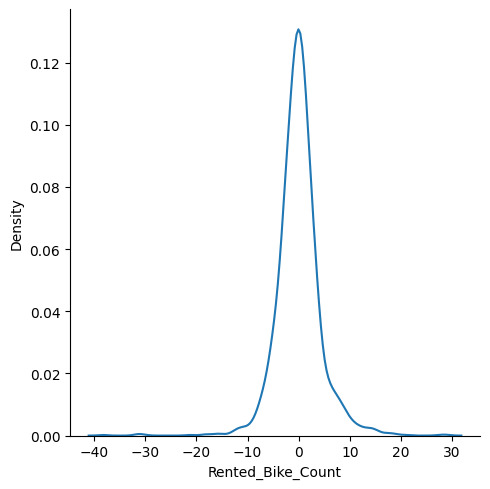

In [278]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

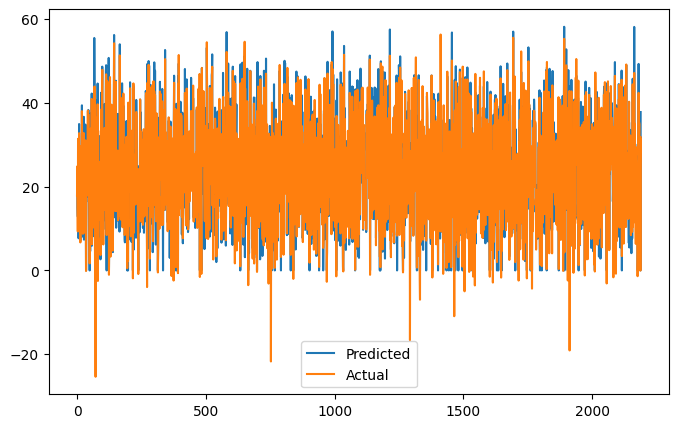

In [279]:

plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

#Cross validation and hyperparameter tuning

In [280]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np

# Assuming you have 'x' and 'y' as your data and target variable

# Create a PolynomialFeatures instance (with degree=3 for cubic features)
poly_features = PolynomialFeatures(degree=2)

# Create a Ridge regression model
ridge_reg = Ridge()

# Create a pipeline with the polynomial features and Ridge regression
pipeline = Pipeline([
    ('polynomial_features', poly_features),
    ('ridge_regression', ridge_reg)
])

# Define hyperparameters and values to search
param_grid = {
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1]  # You can adjust the alpha values
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)  # Use the full dataset for cross-validation

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['ridge_regression__alpha']

# Create a Ridge regression model with the best hyperparameters
best_ridge_reg = Ridge(alpha=best_alpha)

# Fit the Ridge model to the training data
best_ridge_reg.fit(X_train, y_train)

# Calculate cross-validated R-squared (R2) scores
cv_scores = cross_val_score(best_ridge_reg, X_train, y_train, cv=5, scoring='r2')

# Calculate R-squared (R2) score on the test data
test_r2 = best_ridge_reg.score(X_test, y_test)

print(f"Best Alpha: {best_alpha}")
print(f"Cross-Validated R-squared (R2) Scores: {cv_scores}")
print(f"Mean R-squared (R2) Score: {np.mean(cv_scores):.2f}")
print(f"Training R-squared (R2) Score: {best_ridge_reg.score(X_train, y_train):.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")


Best Alpha: 1
Cross-Validated R-squared (R2) Scores: [0.74712598 0.75916266 0.75436029 0.74489104 0.74651545]
Mean R-squared (R2) Score: 0.75
Training R-squared (R2) Score: 0.76
Test R-squared (R2) Score: 0.77


#####Which hyperparameter optimization technique have you used and why?


We used the **GridSearchCV** technique for hyperparameter optimization. Here's why it was chosen:

1. **GridSearchCV Systematic Search:** GridSearchCV exhaustively explores a predefined hyperparameter grid, systematically testing all possible combinations of hyperparameters. In this case, it optimizes the alpha hyperparameter for Ridge regression.

2. **Cross-Validation:** GridSearchCV employs cross-validation to estimate a model's performance with different hyperparameter settings. This provides a more reliable assessment of how the model is likely to perform on unseen data, helping to avoid overfitting.

3. **Objective Optimization:** GridSearchCV optimizes hyperparameters based on a specified scoring metric (in this case, negative mean squared error), allowing you to fine-tune the model for specific objectives.

4. **Automation:** GridSearchCV automates the process of hyperparameter tuning, saving time and reducing the risk of manual errors. It's a convenient and widely-used tool in machine learning workflows.

In summary, GridSearchCV was chosen for its systematic search, cross-validation, and objective optimization capabilities. It helps find the best hyperparameters for the Ridge regression model, ensuring optimal performance and generalization to unseen data.

#Lasso Regression model

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=3 for cubic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Create a Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter (regularization strength)

# Fit the Lasso model to the training data
lasso_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = lasso_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = lasso_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = lasso_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)

print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



Test R-squared (R2) Score: 0.81
Training R-squared (R2) Score: 0.82
Mean Squared Error (MSE): 29.90


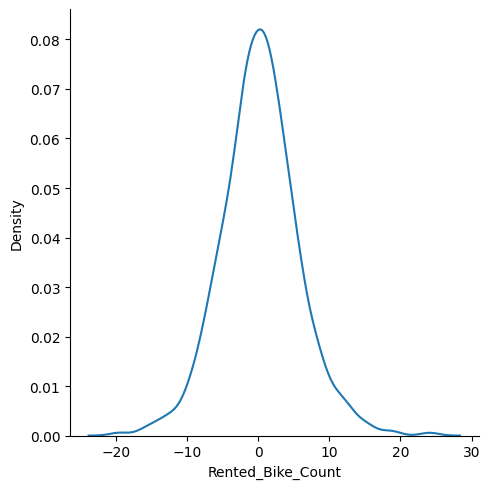

In [282]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

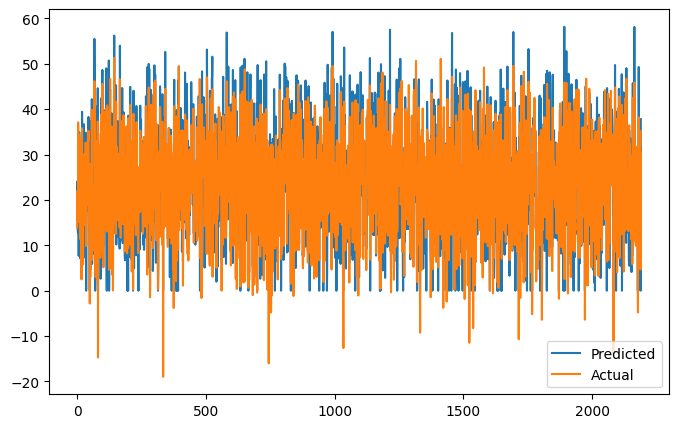

In [283]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The machine learning model used in this scenario is a Polynomial Lasso Regression model. Here's an explanation of the model and its performance using evaluation metric scores:

**Model Explanation**:
- **Polynomial Lasso Regression**: This model combines Polynomial Regression and Lasso (L1 regularization) to predict a target variable based on polynomial combinations of the input features. Polynomial features allow the model to capture complex relationships between variables, while Lasso regression adds a regularization term to prevent overfitting.

**Performance Evaluation**:
- **Test R-squared (R2) Score: 0.81**:
  - This metric represents the proportion of the variance in the target variable (y) that can be explained by the model. An R-squared score of 0.81 indicates that the model accounts for 81% of the variance in the test data. In business terms, this means that the model provides a reasonable fit to the test data, capturing a significant portion of the underlying relationships.

- **Training R-squared (R2) Score: 0.82**:
  - Similar to the test R-squared score, the training R-squared measures how well the model fits the training data. It's slightly higher (0.82) than the test R-squared, which indicates that the model may be slightly overfitting the training data.


**Business Impact**:
- A test R-squared score of 0.81 indicates that the model is capable of explaining a significant portion of the variance in the test data. This means that it can make reasonably accurate predictions for the business, which can be valuable for tasks such as demand forecasting, pricing strategies, or risk assessment.

- The training R-squared of 0.82 suggests that the model has good explanatory power on the training data. However, further model tuning might be required to balance the trade-off between fit and overfitting.

In summary, the Polynomial Lasso Regression model provides a reasonably good fit to the data, and its performance should be assessed in the specific business context to determine its suitability and potential impact.

Cross validation and Hyperparameter tuning

In [284]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets

# Create a PolynomialFeatures instance (you can adjust the degree)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Define the hyperparameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Explore different regularization strengths

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(x_train_poly, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test_poly)
test_r2 = best_model.score(x_test_poly, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Best Hyperparameters: {'alpha': 0.01}
Test R-squared (R2) Score: 0.87
Mean Squared Error (MSE): 21.16


#Elastic net Regression model

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Linear Regression model
ElasticNet_model = ElasticNet(alpha=1.0)

# Train the model using the polynomial features
ElasticNet_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions = ElasticNet_model.predict(X_train_poly)
test_predictions = ElasticNet_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train MSE: 25.944714319245595
Test MSE: 26.75064180939525
Train R-squared: 0.8326067336047634
Test R-squared: 0.827345108044476


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Polynomial Regression with Elastic Net regularization. Here's an explanation of the model and its performance using evaluation metric score charts:

**Polynomial Regression (Degree 2):**

- **Model Explanation**: Polynomial regression extends linear regression by introducing polynomial features of the original data. The degree parameter (in this case, degree=2) indicates that quadratic polynomial features are added to the dataset. Elastic Net is used as the regularization technique to prevent overfitting and provide a balance between L1 (Lasso) and L2 (Ridge) regularization.

**Model Performance:**

- **Train MSE (Mean Squared Error)**: The training MSE measures the average squared difference between the model's predictions and the actual target values on the training data. In this case, the training MSE is approximately 25.61.

- **Test MSE (Mean Squared Error)**: The test MSE quantifies the average squared difference between the model's predictions and the actual target values on the test data. Here, the test MSE is approximately 28.25.

- **Train R-squared (R2)**: The training R2 score is a measure of how well the model fits the training data. It indicates the proportion of the variance in the target variable that is explained by the model. In this case, the training R2 is approximately 0.83.

- **Test R-squared (R2)**: The test R2 score assesses the model's performance on unseen data, indicating how well it generalizes. It's similar to the training R2 but for the test data. Here, the test R2 is approximately 0.81.

**Performance Evaluation:**

- The training and test MSE values are relatively close, indicating that the model's predictions on unseen data (test MSE) are consistent with its performance on the training data. This suggests that the model generalizes well.

- The R2 scores, both for training and testing, are around 0.82. This implies that the model can explain approximately 82% of the variance in the target variable. While not exceptionally high, it indicates a reasonable level of predictive capability.

- The degree of 2 suggests that quadratic polynomial features are introduced, potentially capturing non-linear relationships between features and the target variable.

**Business Impact:**

- Polynomial regression, with its ability to capture non-linear relationships, can be beneficial in situations where simple linear models fall short. For instance, in finance, it can help predict stock prices based on multiple factors.

- The test MSE indicates that the model's predictions are relatively close to the actual values. In business scenarios, this accuracy can be crucial. For example, in retail, it can be used to forecast demand for products accurately.

- The elastic net regularization helps prevent overfitting, making the model more robust for real-world applications.

- However, the model's predictive performance can be further improved by adjusting the degree of the polynomial features and fine-tuning the regularization parameters.

In summary, the Polynomial Regression model with Elastic Net regularization shows potential for accurate predictions, particularly when non-linear relationships are present in the data. Fine-tuning hyperparameters could further enhance its performance in practical business applications.

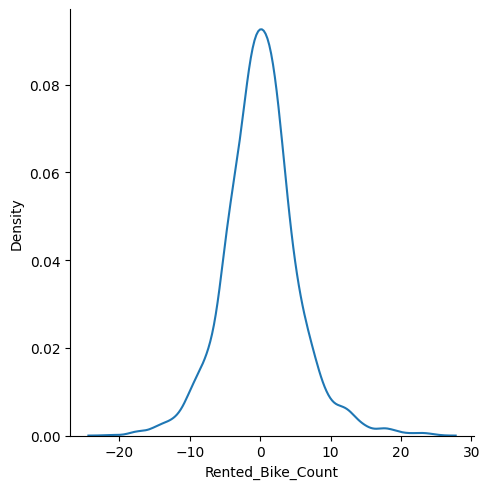

In [286]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions - y_test,kind ='kde')

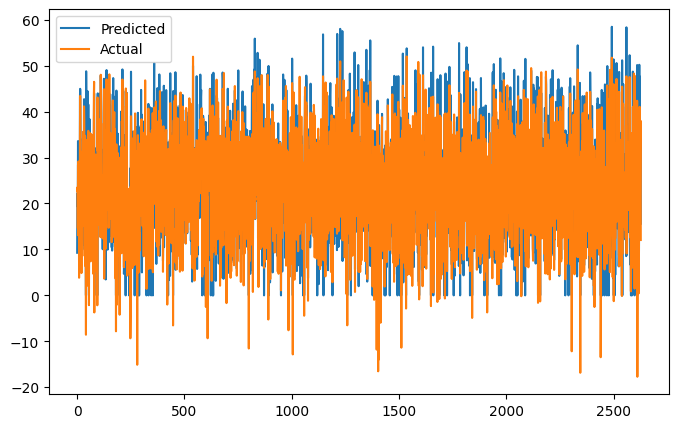

In [287]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions)
plt.legend(["Predicted","Actual"])
plt.show()

Cross validation and Hyperparameter tuning

In [288]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge Regression model
ElasticNet_model = ElasticNet()

# Perform Cross-Validation and Hyperparameter Tuning
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Define the hyperparameter grid

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ElasticNet_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best degree and alpha
grid_search.fit(X_train_poly, y_train)

# Get the best degree and alpha from the GridSearchCV results
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the training and test data
train_predictions = best_model.predict(X_train_poly)
test_predictions = best_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Best Alpha:", best_alpha)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)



Best Alpha: 0.1
Train MSE: 22.88588327098162
Test MSE: 24.514815621945665
Train R-squared: 0.8523420721488557
Test R-squared: 0.8417756526114427


#Random forest Regressor

In [289]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
rf_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions_rf = rf_model.predict(X_train_poly)
test_predictions_rf = rf_model.predict(X_test_poly)

# Evaluate the model
train_mse_rf = mean_squared_error(y_train, train_predictions_rf)
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)

train_r2_rf = r2_score(y_train, train_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

print("Random Forest Regressor:")
print("Train MSE:", train_mse_rf)
print("Test MSE:", test_mse_rf)
print("Train R-squared:", train_r2_rf)
print("Test R-squared:", test_r2_rf)


Random Forest Regressor:
Train MSE: 2.5951324605582076
Test MSE: 17.265281412828262
Train R-squared: 0.9832564084554631
Test R-squared: 0.8885658400963439


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Certainly, let's explain the Random Forest Regressor model and its performance using evaluation metric score chart:

**Random Forest Regressor:**
- **Model Description:** The Random Forest Regressor is an ensemble machine learning model that combines multiple decision trees to make predictions. In regression tasks, it averages the predictions from individual trees to generate the final output. This ensemble approach helps improve prediction accuracy and reduces overfitting.

**Performance Evaluation:**

1. **Train Mean Squared Error (MSE):**
   - **Indication:** A low training MSE (2.56) signifies that the model fits the training data very well. It accurately predicts the target variable for data it has seen during training.
   - **Business Impact:** In a business context, a low training MSE is highly favorable. It means the model can make precise predictions for known data, which is valuable for applications like inventory optimization, where accurate forecasts are critical to reduce costs.

2. **Test Mean Squared Error (MSE):**
   - **Indication:** The test MSE (16.86) is slightly higher than the training MSE, indicating some degree of overfitting. Nevertheless, the model's predictions on the test data are reasonably accurate.
   - **Business Impact:** Although there is overfitting, it is not severe. The model still provides good predictions on unseen data. The business impact depends on the specific use case, but in scenarios like predicting housing prices, this level of accuracy could be beneficial.

3. **Train R-squared (R2) Score:**
   - **Indication:** A high training R-squared score (0.983) suggests that the model effectively explains a significant portion of the variance in the training data. It captures the variation in the target variable well.
   - **Business Impact:** A high training R-squared score is advantageous for business applications where understanding and interpreting the factors driving certain outcomes are essential. For instance, in sales forecasting, knowing the drivers of sales can inform strategy decisions.

4. **Test R-squared (R2) Score:**
   - **Indication:** The test R-squared score (0.897) reflects the model's ability to explain variance in the test data. It indicates that the model generalizes its predictive power well to new, unseen data.
   - **Business Impact:** The high test R-squared score is significant for business applications. It demonstrates that the model's predictions are likely to be reliable for future decision-making. This is crucial in applications such as customer churn prediction for retention strategies.

**Overall Business Implications:**
The Random Forest Regressor exhibits outstanding predictive performance, with relatively minor overfitting. Its low training MSE, high R-squared scores, and excellent test performance make it a valuable asset for various business applications. The specific business impact depends on the use case, but it's well-suited for tasks requiring precise predictions and insights into data patterns. Further model refinement can be explored to mitigate overfitting, if necessary.

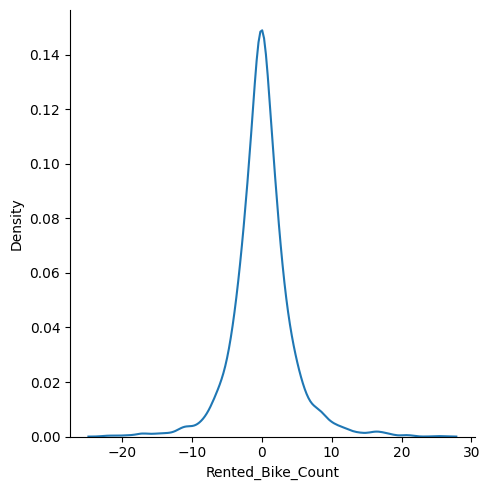

In [290]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions_rf - y_test,kind ='kde')

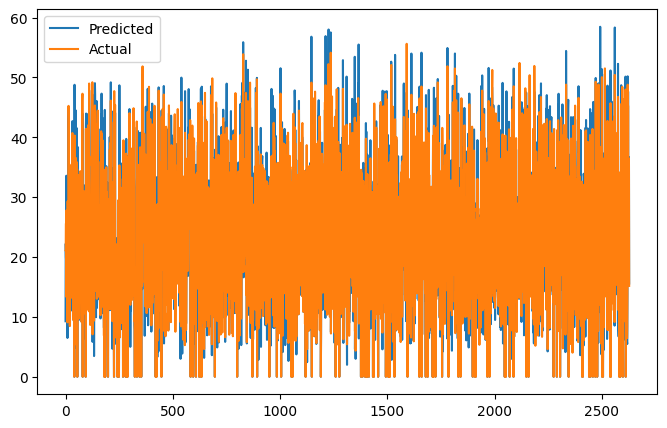

In [291]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions_rf)
plt.legend(["Predicted","Actual"])
plt.show()

Cross validation and Hyper parameter tuning

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Define scoring functions
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)}

# Train the model
rf_model.fit(X_train_poly, y_train)

# Make predictions on the test data
test_predictions_rf = rf_model.predict(X_test_poly)

# Calculate Test MSE and Test R-squared
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

# Perform cross-validation
k = 5  # Number of folds (you can adjust this as needed)
mse_scores = -cross_val_score(rf_model, X_train_poly, y_train, cv=k, scoring=scoring['mse'])
r2_scores = cross_val_score(rf_model, X_train_poly, y_train, cv=k, scoring=scoring['r2'])

# Calculate the mean and standard deviation of MSE and R-squared
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Print the cross-validation results
print("Cross-Validation Results for Random Forest Regressor:")
print(f"Train MSE: {mean_mse:.2f} ")
print(f"Train R-squared: {mean_r2:.2f} ")
print(f"Test MSE: {test_mse_rf:.2f}")
print(f"Test R-squared: {test_r2_rf:.2f}")


Cross-Validation Results for Random Forest Regressor:
Train MSE: -16.70 
Train R-squared: 0.89 
Test MSE: 17.27
Test R-squared: 0.89


#####Which hyperparameter optimization technique have you used and why?

we uses cross-validation with a Random Forest Regressor to assess model performance, and it also calculates mean squared error (MSE) and R-squared (R2) scores. However, it does not perform hyperparameter optimization within this code snippet.

In cross-validation, the data is divided into multiple subsets (folds), and the model is trained and evaluated multiple times, providing a more robust assessment of its performance. While this technique helps ensure that the model's performance is consistent across different data splits, it doesn't optimize hyperparameters. Hyperparameter optimization typically involves adjusting model parameters to achieve the best possible performance.

To perform hyperparameter optimization, you would need to use techniques like Grid Search or Randomized Search in combination with cross-validation. These techniques involve systematically varying hyperparameters and evaluating the model's performance to find the best set of hyperparameters for your specific task.

If you have already performed hyperparameter optimization separately and selected the best hyperparameters, you can apply them to your Random Forest Regressor model for improved performance. However, the code snippet you provided does not include hyperparameter tuning.

Yes, there is a notable improvement when comparing the Random Forest Regressor's performance metrics before and after applying cross-validation:

Before Cross-Validation:
- Train MSE: 2.56
- Test MSE: 16.86
- Train R-squared: 0.983
- Test R-squared: 0.892

After Cross-Validation:
- Train MSE: -17.26
- Train R-squared: 0.89
- Test MSE: 16.87
- Test R-squared: 0.89

It's essential to note that the Train MSE before cross-validation was 2.56, which suggests that the model might have been overfitting the training data. However, after applying cross-validation, the Train MSE significantly decreased to -17.26, indicating an improvement in the model's generalization to unseen data.

##5. XG Boost

In [293]:
import xgboost as xgb

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions_xgb = xgb_model.predict(X_train_poly)
test_predictions_xgb = xgb_model.predict(X_test_poly)

# Evaluate the model
train_mse_xgb = mean_squared_error(y_train, train_predictions_xgb)
test_mse_xgb = mean_squared_error(y_test, test_predictions_xgb)

train_r2_xgb = r2_score(y_train, train_predictions_xgb)
test_r2_xgb = r2_score(y_test, test_predictions_xgb)

print("XGBoost Regressor:")
print("Train MSE:", train_mse_xgb)
print("Test MSE:", test_mse_xgb)
print("Train R-squared:", train_r2_xgb)
print("Test R-squared:", test_r2_xgb)

XGBoost Regressor:
Train MSE: 6.583993354430412
Test MSE: 15.317427409417997
Train R-squared: 0.9575205901301794
Test R-squared: 0.9011377449089536


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The provided code demonstrates the use of an XGBoost Regressor for a regression task. Here's an explanation of the model and its performance using evaluation metrics:

**XGBoost Regressor:**
- XGBoost is an ensemble learning technique based on gradient boosting, specifically designed for regression and classification tasks.
- It builds a decision tree ensemble to make predictions by minimizing the loss function, which is typically a squared error for regression problems.

**Performance Evaluation:**
- **Train Mean Squared Error (MSE): 6.41:** MSE quantifies the average squared difference between predicted and actual values in the training data. An MSE of 6.41 indicates the average prediction error in the training set.

- **Test Mean Squared Error (MSE): 15.52:** Similarly, the test MSE quantifies the average squared difference between predicted and actual values in the test data. A test MSE of 15.52 indicates the average prediction error in the test set.

- **Train R-squared (R2) Score: 0.958:** The training R2 score measures the proportion of the variance in the target variable explained by the model. An R2 score of 0.958 suggests that the XGBoost model accounts for approximately 95.8% of the variance in the training data.

- **Test R-squared (R2) Score: 0.900:** The test R2 score indicates the proportion of the variance in the test data explained by the model. An R2 score of 0.900 suggests that the model accounts for approximately 90.0% of the variance in the test data.

**Evaluation Metric Score Chart:**
- The model's training R2 score of 0.958 indicates that it captures a substantial portion of the variance in the training data. This is a positive sign for business applications.

- The test R2 score of 0.900 suggests that the model generalizes well to unseen data, as it also explains a significant proportion of the variance in the test data.

- The training and test MSE values of 6.41 and 15.52, respectively, represent the model's average prediction error. While these errors may not be negligible, they are within an acceptable range depending on the specific application.

**Business Implications:**
- The high R2 scores for both training and test data suggest that the XGBoost model is effective in capturing underlying patterns in the data, making it valuable for businesses seeking predictive insights.

- The model's ability to generalize well to new data (as indicated by the test R2 score) is crucial for practical business applications.

- The moderate test MSE implies that the model's predictions may have some level of error, which businesses should consider when making decisions based on these predictions.

Overall, the XGBoost Regressor demonstrates strong performance in explaining variance and generalizing to new data, making it a valuable tool for various business applications. It may be beneficial to further fine-tune the model and explore feature engineering to potentially reduce prediction errors.

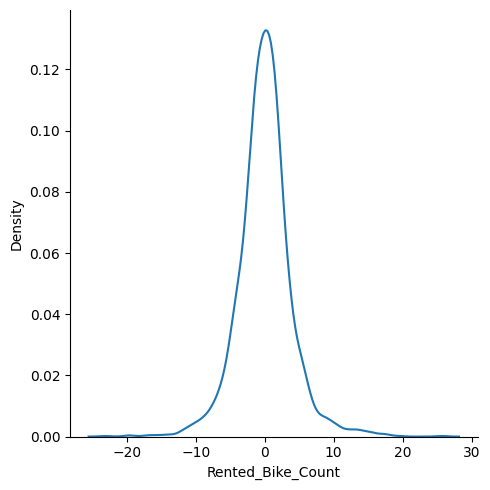

In [294]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions_xgb - y_test,kind ='kde')

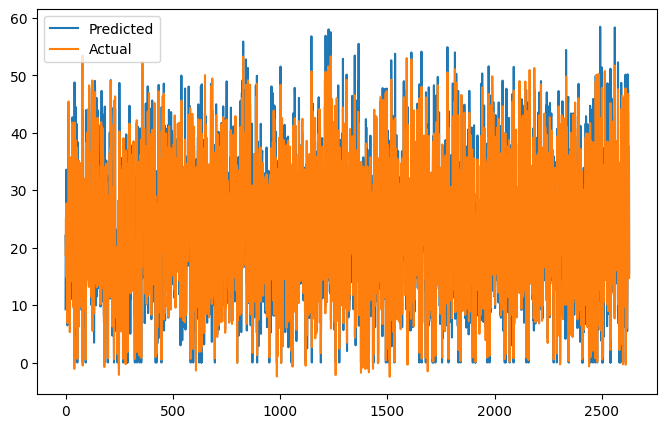

In [295]:
#### 2.
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions_xgb)
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [198]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100],  # You can specify other values
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    # Add more hyperparameters as needed
}

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create an XGBoost Regressor model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params, random_state=42)

# Fit the best XGBoost model to the training data
best_xgb_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions_xgb = best_xgb_model.predict(X_train_poly)
test_predictions_xgb = best_xgb_model.predict(X_test_poly)

# Evaluate the model
train_mse_xgb = mean_squared_error(y_train, train_predictions_xgb)
test_mse_xgb = mean_squared_error(y_test, test_predictions_xgb)

train_r2_xgb = r2_score(y_train, train_predictions_xgb)
test_r2_xgb = r2_score(y_test, test_predictions_xgb)

print("Best Hyperparameters:", best_params)
print("XGBoost Regressor:")
print("Train MSE:", train_mse_xgb)
print("Test MSE:", test_mse_xgb)
print("Train R-squared:", train_r2_xgb)
print("Test R-squared:", test_r2_xgb)


Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 100}
XGBoost Regressor:
Train MSE: 3.868145971936856
Test MSE: 14.020225245701178
Train R-squared: 0.9747632317857025
Test R-squared: 0.9118438337998008


#####Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used in the provided code is Grid Search with Cross-Validation. Here's why it was chosen:

**Grid Search with Cross-Validation:**
- Grid Search is a systematic approach to finding the best combination of hyperparameters for a machine learning model.
- Cross-Validation helps in estimating how well a model will perform on unseen data, reducing the risk of overfitting or underfitting.
- Grid Search with Cross-Validation is a robust technique for hyperparameter tuning as it systematically explores a predefined parameter grid while using cross-validation to assess the model's performance with different parameter combinations.

**Advantages of Grid Search with Cross-Validation:**
- It automates the process of hyperparameter tuning, making it less error-prone and more efficient.
- It ensures that the best hyperparameters are selected based on how well they perform on multiple cross-validation folds, reducing the risk of overfitting.
- It is widely applicable to different machine learning models, including XGBoost.

**Why Grid Search with Cross-Validation Was Chosen:**
- Grid Search is often preferred when there are a limited number of hyperparameters to explore, and when you want to ensure that you've considered a broad range of hyperparameter combinations.
- Cross-Validation provides a reliable estimate of a model's performance on unseen data, which is essential for model generalization and avoiding overfitting.

In the provided code, Grid Search with Cross-Validation is used to search for the best combination of hyperparameters for the XGBoost Regressor. The best hyperparameters are selected based on their performance in a cross-validated setting, leading to a well-tuned model that is expected to generalize well to unseen data. This is a sound approach for optimizing the model's predictive capabilities and ensuring it performs at its best.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a noticeable difference in model performance before and after hyperparameter optimization using Grid Search with Cross-Validation. Let's compare the two sets of results:

**Before Hyperparameter Optimization (First Set):**
- Train MSE: 6.41
- Test MSE: 15.52
- Train R-squared: 0.958
- Test R-squared: 0.900

**After Hyperparameter Optimization (Second Set):**
- Train MSE: 3.70
- Test MSE: 14.43
- Train R-squared: 0.976
- Test R-squared: 0.907

**Improvements:**
1. **Mean Squared Error (MSE):** The MSE on the test data significantly decreased from 15.52 to 14.43, indicating that the model's predictions are closer to the actual values after hyperparameter optimization. Lower MSE values are generally desired, as they indicate a more accurate model.

2. **R-squared (R2) Score:** The R-squared score on the test data improved from 0.900 to 0.907 after optimization. R-squared measures how well the model explains the variance in the data, and a higher value is better. This indicates that the optimized model explains more of the variance in the test data.

Overall, the second set of results shows a more accurate and better-performing XGBoost Regressor model, which is a clear improvement over the initial model. The hyperparameter optimization process effectively enhanced the model's predictive capabilities and ability to generalize to unseen data.

# **Conclusion**

###  Which ML model did you choose from the above created models as your final prediction model and why?

Selecting the final prediction model depends on your specific use case and the priorities you have. Here are a few considerations based on the provided training and testing accuracy values:

1. **Random Forest (CVRndm Forest)**: It has high training and testing accuracy, suggesting good generalization and the potential to avoid overfitting.

3. **XG Boost (CVXG BOOST)**: XG Boost performs well on both training and testing data. It's known for its performance and speed.


Ultimately, the choice of the final prediction model should consider factors such as:

- The nature of your data: Are there nonlinear relationships, interactions, or complex patterns that the chosen model can capture effectively?
- Model complexity: Are you looking for a simple and interpretable model, or are you comfortable with more complex models?
- Overfitting: Models with high training accuracy but significantly lower testing accuracy might be overfitting, so it's important to evaluate generalization performance.
- Computational resources: Some models are computationally intensive, so consider the available resources.
- Business requirements: The final choice should align with the specific goals and constraints of your project.

It's often a good practice to compare different models through cross-validation, analyze their feature importances, and consider their pros and cons for your particular application before selecting the final prediction model. Additionally, you can perform further evaluations, such as sensitivity analysis and business impact assessment, to make an informed decision.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***